<a href="https://colab.research.google.com/github/RaedAbdelkefi/A-First-Course-in-Stochastic-Calculus/blob/main/It%C3%B4_Calculus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

##1.Itô integrals

In [ ]:
def Brownian(steps,n,tf):
  dB=(np.sqrt(tf/steps))*np.random.standard_normal((steps,n))
  B0=np.zeros((1,n))
  B=np.concatenate((B0,np.cumsum(dB[:steps-1,:] , axis=0)), axis=0)
  return B,dB

In [ ]:
def Ito(steps,n,tf):
  return np.random.normal(0,np.sqrt(tf/steps),(steps,n))

In [ ]:
def Ito_integral(X,steps,n,tf):
  B,dB=Brownian(steps,n,tf)
  I=X*dB
  I=np.cumsum(I, axis=0)
  return I


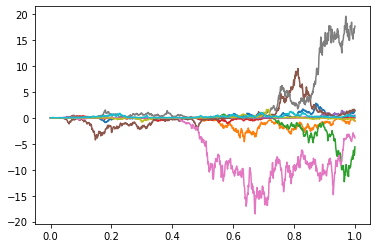

In [ ]:
X,dB=Brownian(1000,10,1)
X=4*X**3
I=Ito_integral(X,1000,10,1)
times=np.linspace(0,1,1000)
plt.plot(times,X)
plt.show()

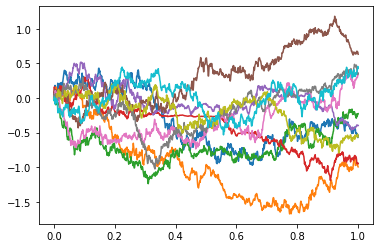

In [ ]:
X,dB=Brownian(1000,10,1)
Y=np.cos(X)
I=Ito_integral(Y,1000,10,1)
plt.plot(times,I)
plt.show()

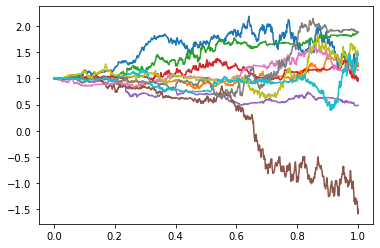

In [ ]:
times=np.linspace(0,1,1000)
times.resize((1000,1))
X,dB=Brownian(1000,10,1)
X=np.exp(times)*np.sin(X)
I=Ito_integral(X,1000,10,1)
Y=1-I
times=np.linspace(0,1,1000)

plt.plot(times,Y)
plt.show()

##2. Ornstein-Uhlenbeck process and Brownian bridge revisited.

In [ ]:
def Ornstein(dI,steps,n,tf):
  cov =np.zeros((steps,steps))
  for i in range(steps):
    for j in range(steps):
      cov[i][j]=(np.exp(-2*np.linalg.norm(i-j))/2*100)*(1-np.exp(-2*min(i+1,j+1)/100))
  A=np.linalg.cholesky(cov)
  Z=dI/np.sqrt(tf/steps)
  Y=A@Z
  Y=np.insert(Y,0,np.zeros(n,int),axis=0)
  return Y

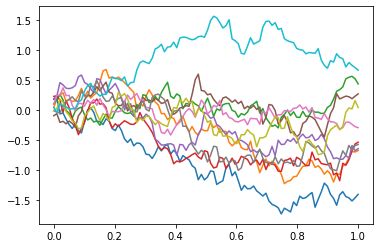

In [ ]:
np.random.seed(0)
times=np.linspace(0,1,100)
ta=times.resize((100,1))
t=times*np.ones((100,10))
X=np.exp(t)
Y=np.exp(-t)
dI=np.sqrt(0.01)*np.random.standard_normal((100,10))
A=X*dI
I=A.cumsum(axis=0)
I=Y*I
I1=Ornstein(dI,100,10,1)
I1=I1[:100,:]
plt.plot(times,I)

plt.show()

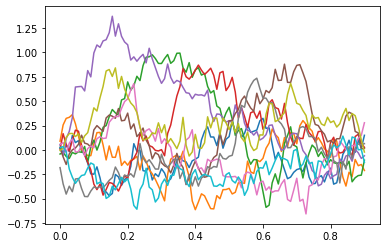

In [ ]:
times=np.linspace(0,0.9,100)
ta=times.resize((100,1))
t=times*np.ones((100,10))
X=1/(1-t)
Y=1-t
dI=np.sqrt(0.01)*np.random.standard_normal((100,10))
A=dI*X
I=A.cumsum(axis=0)
I=I*Y

plt.plot(times,I)
plt.show()

##3. Itô’s formula

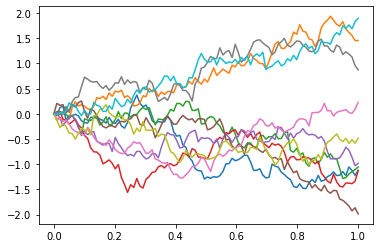

In [ ]:
B,dB=Brownian(100,10,1)
times=np.linspace(0,1,100)
I=B**4 - (6*(B**2)*0.01*np.ones((100,10))).cumsum(axis=0)
plt.plot(times,B)
plt.show()

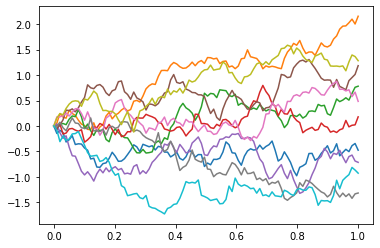

In [ ]:
B,dB=Brownian(100,10,1)
times=np.linspace(0,1,100)
I=np.sin(B) + (0.5*np.sin(B)*0.01*np.ones((100,10))).cumsum(axis=0)
plt.plot(times,B)
plt.show()

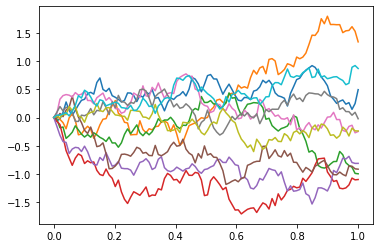

In [ ]:
B,dB=Brownian(100,10,1)
times=np.linspace(0,1,100)
times.resize((100,1))
t=times*np.ones((100,10))
I=np.exp(t/2)*np.cos(B)
plt.plot(times,B)
plt.show()

##4. A path-dependent integrand

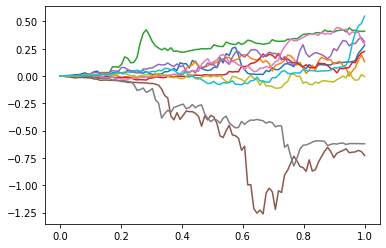

In [ ]:
B,dB=Brownian(100,10,1)
X=(B*dB).cumsum(axis=0)
I=(X*dB).cumsum(axis=0)
times=np.linspace(0,1,100)
plt.plot(times,I)
plt.show()

##5. Convergence of Itô’s formula

In [ ]:
def f(steps,n):
  dB=np.sqrt((1/steps))*np.random.standard_normal((steps,n))
  B=np.concatenate( ( np.zeros((1,n)) , dB[:steps-1,:].cumsum(axis=0)) , axis=0)
  I1=(3*((B**2)*dB)).cumsum(axis=0)
  times=np.linspace(0,1,steps)
  dt=(1/steps)*np.ones((steps,n))
  I2=(3*(B*dt)).cumsum(axis=0)
  I=I1+I2
  A=B**3
  return A,I

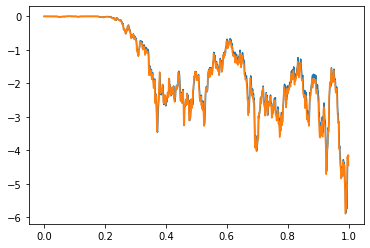

In [ ]:
times=np.linspace(0,1,steps)
plt.plot(times,B[:,0])
plt.plot(times,I[:,0])

In [ ]:
steps=1000
n=100
B,I=f(steps,n)
A=np.zeros((steps,n))
for i in range(steps):
  for j in range(n):
    A[i,j]=np.linalg.norm(B[i,j]-I[i,j])
E=((1/steps)*A.sum(axis=0))[0]
E


0.10266126098946995

##6. Testing the solution to the gambler’s ruin

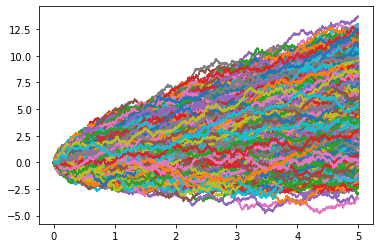

In [ ]:
steps=1000
n=10000
tf=5
B,dB=Brownian(5*steps,n,tf)
times=np.linspace(0,tf,5*steps)
times.resize((5*steps,1))
t=times*np.ones((5*steps,n))
X=B+t
plt.plot(times,X)
plt.show()

In [ ]:
s=0
for i in range(n):
  for j in range(5*steps):
    if X[j,i]<=-1:
      s+=1
      break
print(s/n)

0.1357


In [ ]:
np.exp(-2)

0.1353352832366127

7. The integral of a process not in $L_{c}^{2}(T)$

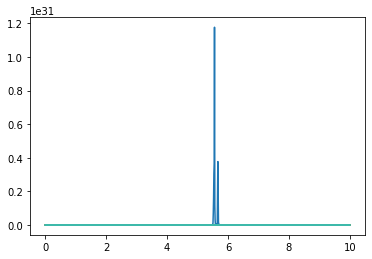

In [ ]:
steps=100
tf=10
n=100
B,dB=Brownian(tf*steps,n,tf)
times=np.linspace(0,tf,tf*steps)

plt.plot(times,np.exp(B**2))
plt.show()

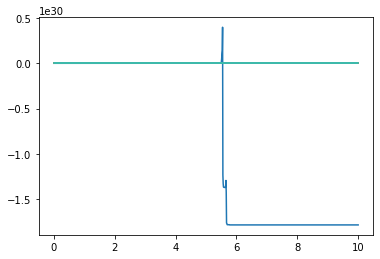

In [ ]:
Z=np.exp(B**2)
I=(Z*dB).cumsum(axis=0)
plt.plot(times,I)
plt.show()

##8. Tanaka’s formula

In [ ]:
def norm(X,steps,n):
  for i in range(steps):
    for j in range(n):
      X[i,j]=np.linalg.norm(X[i,j])
  return X

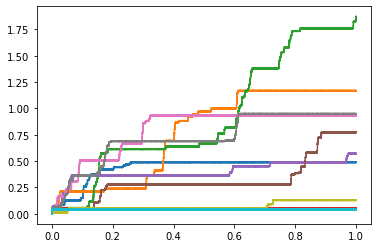

In [ ]:
steps=1000000
tf=1
n=10
B,dB=Brownian(steps,n,tf)
I1=(np.sign(B)*dB).cumsum(axis=0)
I=norm(B,steps,n)-I1
times=np.linspace(0,tf,steps)
plt.plot(times,I)
plt.show()

In [ ]:
epsilon=0.001


In [ ]:
def norm1(X,steps):
  for i in range(steps):
    X[i]=np.linalg.norm(X[i])
  return X

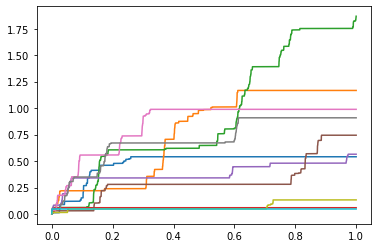

In [ ]:
L=(1/2*epsilon)*(np.abs(B) <epsilon).cumsum(axis=0)
plt.plot(times,L)
plt.show()